In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/history-of-philosophy/philosophy_data.csv


# Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fast')

import nltk

In [3]:
#read data
df= pd.read_csv('/kaggle/input/history-of-philosophy/philosophy_data.csv')
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [4]:
df.shape

#this is really big. i'm going to take a sample

(360808, 11)

In [5]:
sampledf = df.sample(n=500).reset_index()
sampledf.head()

,index,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,296764,Capital,Marx,communism,Hence a lessened demand for those commodities ...,Hence a lessened demand for those commodities ...,1883,1887,56,hence a lessened demand for those commodities ...,"['hence', 'lessened', 'demand', 'for', 'those'...",hence a lessen demand for those commodity voi...
1,24360,Plato - Complete Works,Plato,plato,We thought that we'd find justice most easily ...,We thought that we'd find justice most easily ...,-350,1997,232,we thought that we'd find justice most easily ...,"['we', 'thought', 'that', 'we', 'find', 'justi...",-PRON- think that -PRON- would find justice m...
2,194757,History Of Madness,Foucault,continental,"The faces of the enemy disappeared, and he no ...","The faces of the enemy disappeared, and he no ...",1961,2006,245,"the faces of the enemy disappeared, and he no ...","['the', 'faces', 'of', 'the', 'enemy', 'disapp...","the face of the enemy disappear , and -PRON- ..."
3,172916,Naming And Necessity,Kripke,analytic,Can we really consider it as conceivable that ...,Can we really consider it as conceivable that ...,1972,1990,79,can we really consider it as conceivable that ...,"['can', 'we', 'really', 'consider', 'it', 'as'...",Can -PRON- really consider -PRON- as conceiva...
4,109099,Ethics,Spinoza,rationalism,whereof I will speak presently.,whereof I will speak presently.,1677,2003,31,whereof i will speak presently.,"['whereof', 'will', 'speak', 'presently']",whereof -PRON- will speak presently .


# Exploring the Data

Text(0, 0.5, 'Works Published')

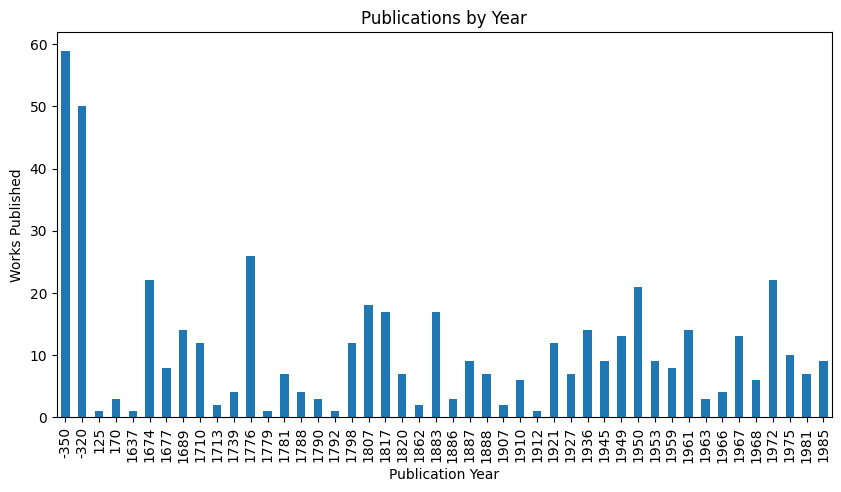

In [6]:
ax = sampledf['original_publication_date'].value_counts().sort_index().plot(kind='bar', title='Publications by Year', figsize=(10,5))
ax.set_xlabel('Publication Year')
ax.set_ylabel('Works Published')

### We can see that the majority of quotes took place in the before christ times, which makes sense because so many famous philosophers are old af! A consideration comes to mind from this- to accurately evaluate the sentiment of philosophical texts published in a given time period, we need to account for this outlier. Perhaps it makes most sense to assign a score to each work, then take aggregates to score each philosopher, and each year

In [7]:
author_counts = sampledf['author'].value_counts()
print(len(author_counts))

36


Text(0, 0.5, 'Works Published')

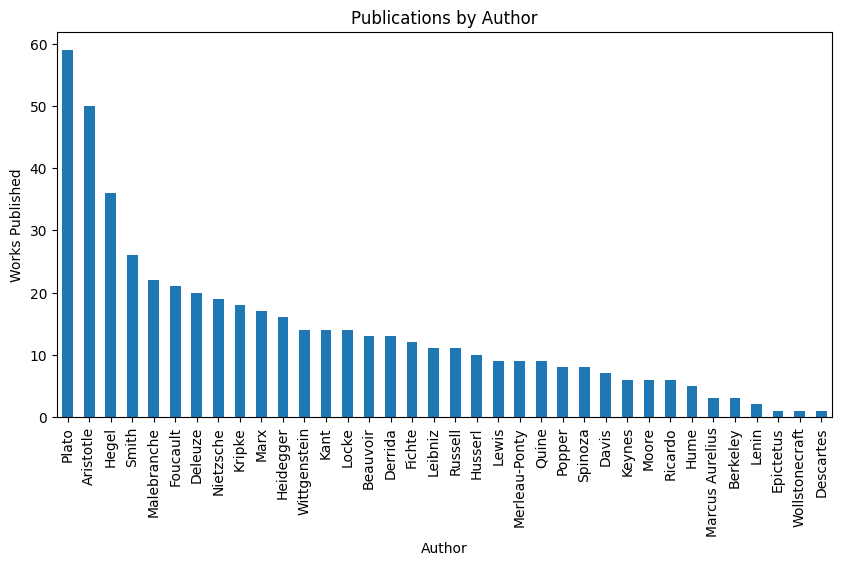

In [8]:
ax = sampledf['author'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Publications by Author', figsize=(10,5))
ax.set_xlabel('Author')
ax.set_ylabel('Works Published')

### Looks like our sample has 36 authors, with Aristotle, and Plato writing a pretty sizable chunk

Text(0, 0.5, 'Works Published')

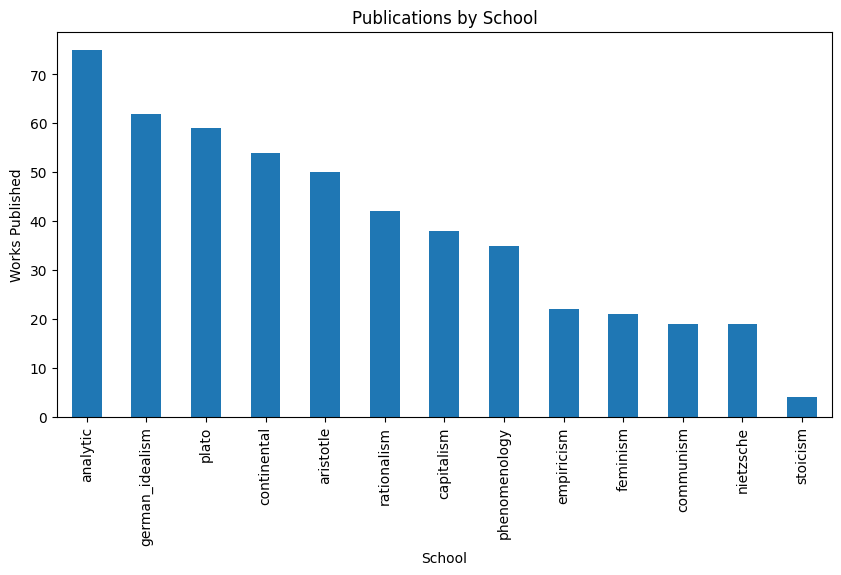

In [9]:
ax = sampledf['school'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Publications by School', figsize=(10,5))
ax.set_xlabel('School')
ax.set_ylabel('Works Published')

### ...and 13 schools of thought. I think this is a good amount of schools to be able to analyze on an individual basis!

# Basic NLTK

In [10]:
#let's check out a sample sentence
example = sampledf['sentence_lowered'][250]
print(example)

these elucidations were published with the third edition of the search after, and with the rest of that work underwent significant and extensive modification with each successive edition.


In [11]:
tokens = sampledf['tokenized_txt'][250]
print(tokens)

['these', 'elucidations', 'were', 'published', 'with', 'the', 'third', 'edition', 'of', 'the', 'search', 'after', 'and', 'with', 'the', 'rest', 'of', 'that', 'work', 'underwent', 'significant', 'and', 'extensive', 'modification', 'with', 'each', 'successive', 'edition']


# VADER Approach

### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a bag of words approach that removes stop words and scores each word to return a total score. This does not account for relationships between words, which is important in actual speech, but it's a start

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
#let's test it out on a sample sentence

sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

### We get a score of negative = 0, neutral = .32, and positive = .68. This is what we would expect. The compound value can range from -1 to 1, aggregating the scores overall.

In [14]:
sia.polarity_scores("The weather is terrible and I want to cry.")

{'neg': 0.496, 'neu': 0.4, 'pos': 0.104, 'compound': -0.7096}

The SIA has categorized this as negative, which is expected

In [15]:
#let's try it on our example

print(example)
sia.polarity_scores(example)

these elucidations were published with the third edition of the search after, and with the rest of that work underwent significant and extensive modification with each successive edition.


{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4404}

In [16]:
# let's run it on the whole dataset and store the results in a dictionary

res = {}
for i, row in tqdm(sampledf.iterrows(), total = len(sampledf)):
    text = row['sentence_lowered']
    myid = row.name
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
# store result in a dataframe

vaders = pd.DataFrame(res).T
vaders = vaders.merge(sampledf, left_index=True, right_index=True)
vaders.head()

,neg,neu,pos,compound,index,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,0.333,0.667,0.000,-0.2500,296764,Capital,Marx,communism,Hence a lessened demand for those commodities ...,Hence a lessened demand for those commodities ...,1883,1887,56,hence a lessened demand for those commodities ...,"['hence', 'lessened', 'demand', 'for', 'those'...",hence a lessen demand for those commodity voi...
1,0.150,0.732,0.117,-0.4033,24360,Plato - Complete Works,Plato,plato,We thought that we'd find justice most easily ...,We thought that we'd find justice most easily ...,-350,1997,232,we thought that we'd find justice most easily ...,"['we', 'thought', 'that', 'we', 'find', 'justi...",-PRON- think that -PRON- would find justice m...
2,0.182,0.763,0.055,-0.4310,194757,History Of Madness,Foucault,continental,"The faces of the enemy disappeared, and he no ...","The faces of the enemy disappeared, and he no ...",1961,2006,245,"the faces of the enemy disappeared, and he no ...","['the', 'faces', 'of', 'the', 'enemy', 'disapp...","the face of the enemy disappear , and -PRON- ..."
3,0.000,1.000,0.000,0.0000,172916,Naming And Necessity,Kripke,analytic,Can we really consider it as conceivable that ...,Can we really consider it as conceivable that ...,1972,1990,79,can we really consider it as conceivable that ...,"['can', 'we', 'really', 'consider', 'it', 'as'...",Can -PRON- really consider -PRON- as conceiva...
4,0.000,1.000,0.000,0.0000,109099,Ethics,Spinoza,rationalism,whereof I will speak presently.,whereof I will speak presently.,1677,2003,31,whereof i will speak presently.,"['whereof', 'will', 'speak', 'presently']",whereof -PRON- will speak presently .


# Visualizing VADER Results

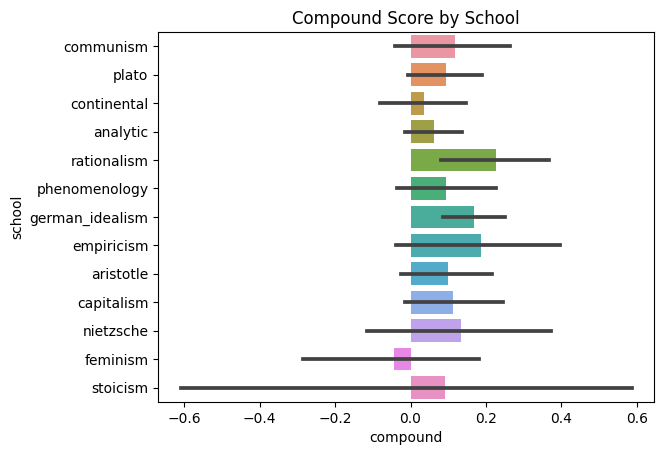

In [18]:
ax = sns.barplot(data=vaders, y='school', x='compound')
ax.set_title('Compound Score by School')
plt.show()

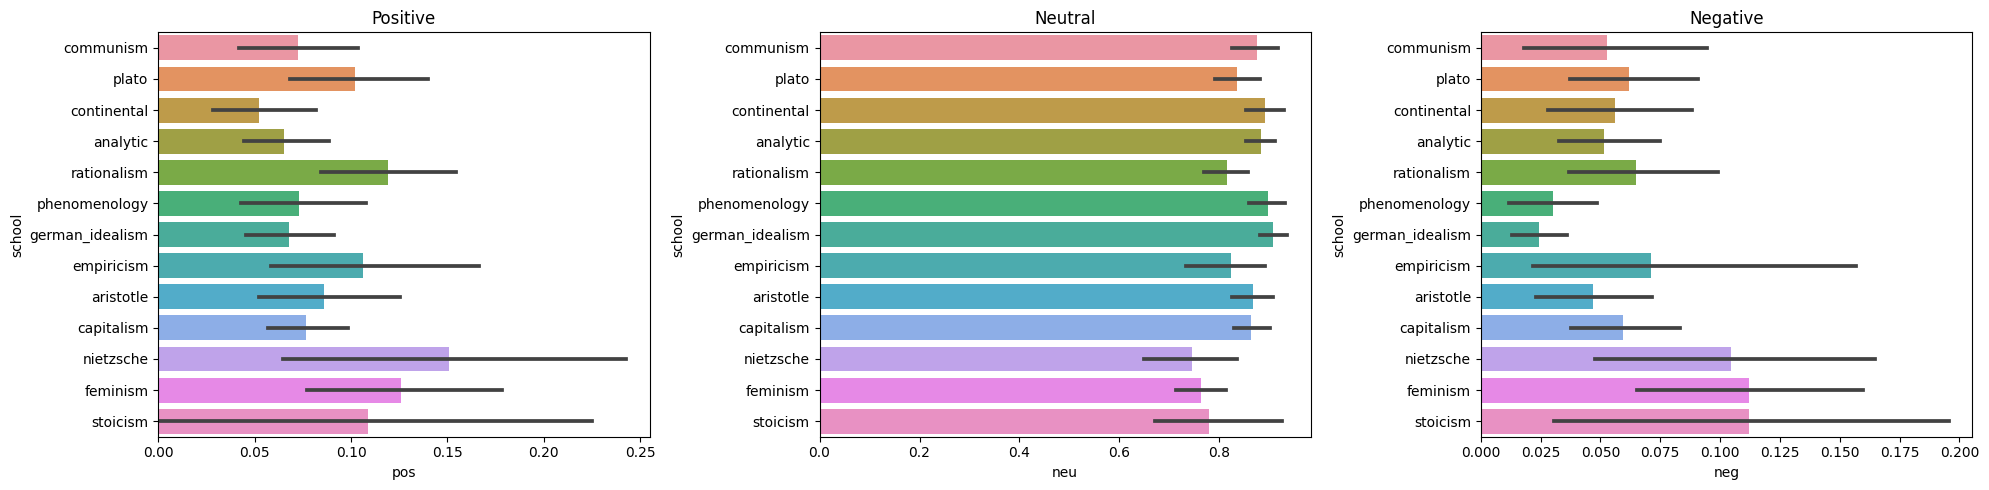

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
sns.barplot(data=vaders, y='school', x='pos', ax=axs[0])
sns.barplot(data=vaders, y='school', x='neu', ax=axs[1])
sns.barplot(data=vaders, y='school', x='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Next up we will try Roberta Model!!!!!

### The Roberta pretrained model will pick up on relationships between words, and the context related to other words (VADER did not do this)

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import AutoConfig
from scipy.special import softmax

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly 

In [22]:
# remember VADER results on example
print(example)
sia.polarity_scores(example)

these elucidations were published with the third edition of the search after, and with the rest of that work underwent significant and extensive modification with each successive edition.


{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4404}

In [23]:
#running roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

print(scores)

[0.017173   0.9143857  0.06844131]


### These 3 values are negative, neutral, and positive scores for this text

In [24]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberts_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.017173, 'roberta_neu': 0.9143857, 'roberts_pos': 0.06844131}


In [25]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberts_pos' : scores[2]
    }
    return scores_dict

In [26]:
res = {}
for i, row in tqdm(sampledf.iterrows(), total = len(sampledf)):
    try:
        text = row['sentence_lowered']
        myid = row.name
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both_results = {**vader_result_rename, **roberta_result}
        res[myid] = both_results
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
# store result in a dataframe

results_df = pd.DataFrame(res).T
results_df = results_df.merge(sampledf, left_index=True, right_index=True)
results_df.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberts_pos,index,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,0.333,0.667,0.000,-0.2500,0.250013,0.709626,0.040361,296764,Capital,Marx,communism,Hence a lessened demand for those commodities ...,Hence a lessened demand for those commodities ...,1883,1887,56,hence a lessened demand for those commodities ...,"['hence', 'lessened', 'demand', 'for', 'those'...",hence a lessen demand for those commodity voi...
1,0.150,0.732,0.117,-0.4033,0.416363,0.529823,0.053814,24360,Plato - Complete Works,Plato,plato,We thought that we'd find justice most easily ...,We thought that we'd find justice most easily ...,-350,1997,232,we thought that we'd find justice most easily ...,"['we', 'thought', 'that', 'we', 'find', 'justi...",-PRON- think that -PRON- would find justice m...
2,0.182,0.763,0.055,-0.4310,0.594128,0.385931,0.019941,194757,History Of Madness,Foucault,continental,"The faces of the enemy disappeared, and he no ...","The faces of the enemy disappeared, and he no ...",1961,2006,245,"the faces of the enemy disappeared, and he no ...","['the', 'faces', 'of', 'the', 'enemy', 'disapp...","the face of the enemy disappear , and -PRON- ..."
3,0.000,1.000,0.000,0.0000,0.857433,0.136131,0.006436,172916,Naming And Necessity,Kripke,analytic,Can we really consider it as conceivable that ...,Can we really consider it as conceivable that ...,1972,1990,79,can we really consider it as conceivable that ...,"['can', 'we', 'really', 'consider', 'it', 'as'...",Can -PRON- really consider -PRON- as conceiva...
4,0.000,1.000,0.000,0.0000,0.021861,0.912097,0.066042,109099,Ethics,Spinoza,rationalism,whereof I will speak presently.,whereof I will speak presently.,1677,2003,31,whereof i will speak presently.,"['whereof', 'will', 'speak', 'presently']",whereof -PRON- will speak presently .


In [28]:
# i will save the results df to a csv file called philosophy_results.csv so you can check the output for that

results_df.to_csv('/kaggle/working/philosophy_results.csv')

# Compare Results

In [29]:
results_df.columns

Index(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberts_pos', 'index', 'title', 'author', 'school',
       'sentence_spacy', 'sentence_str', 'original_publication_date',
       'corpus_edition_date', 'sentence_length', 'sentence_lowered',
       'tokenized_txt', 'lemmatized_str'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

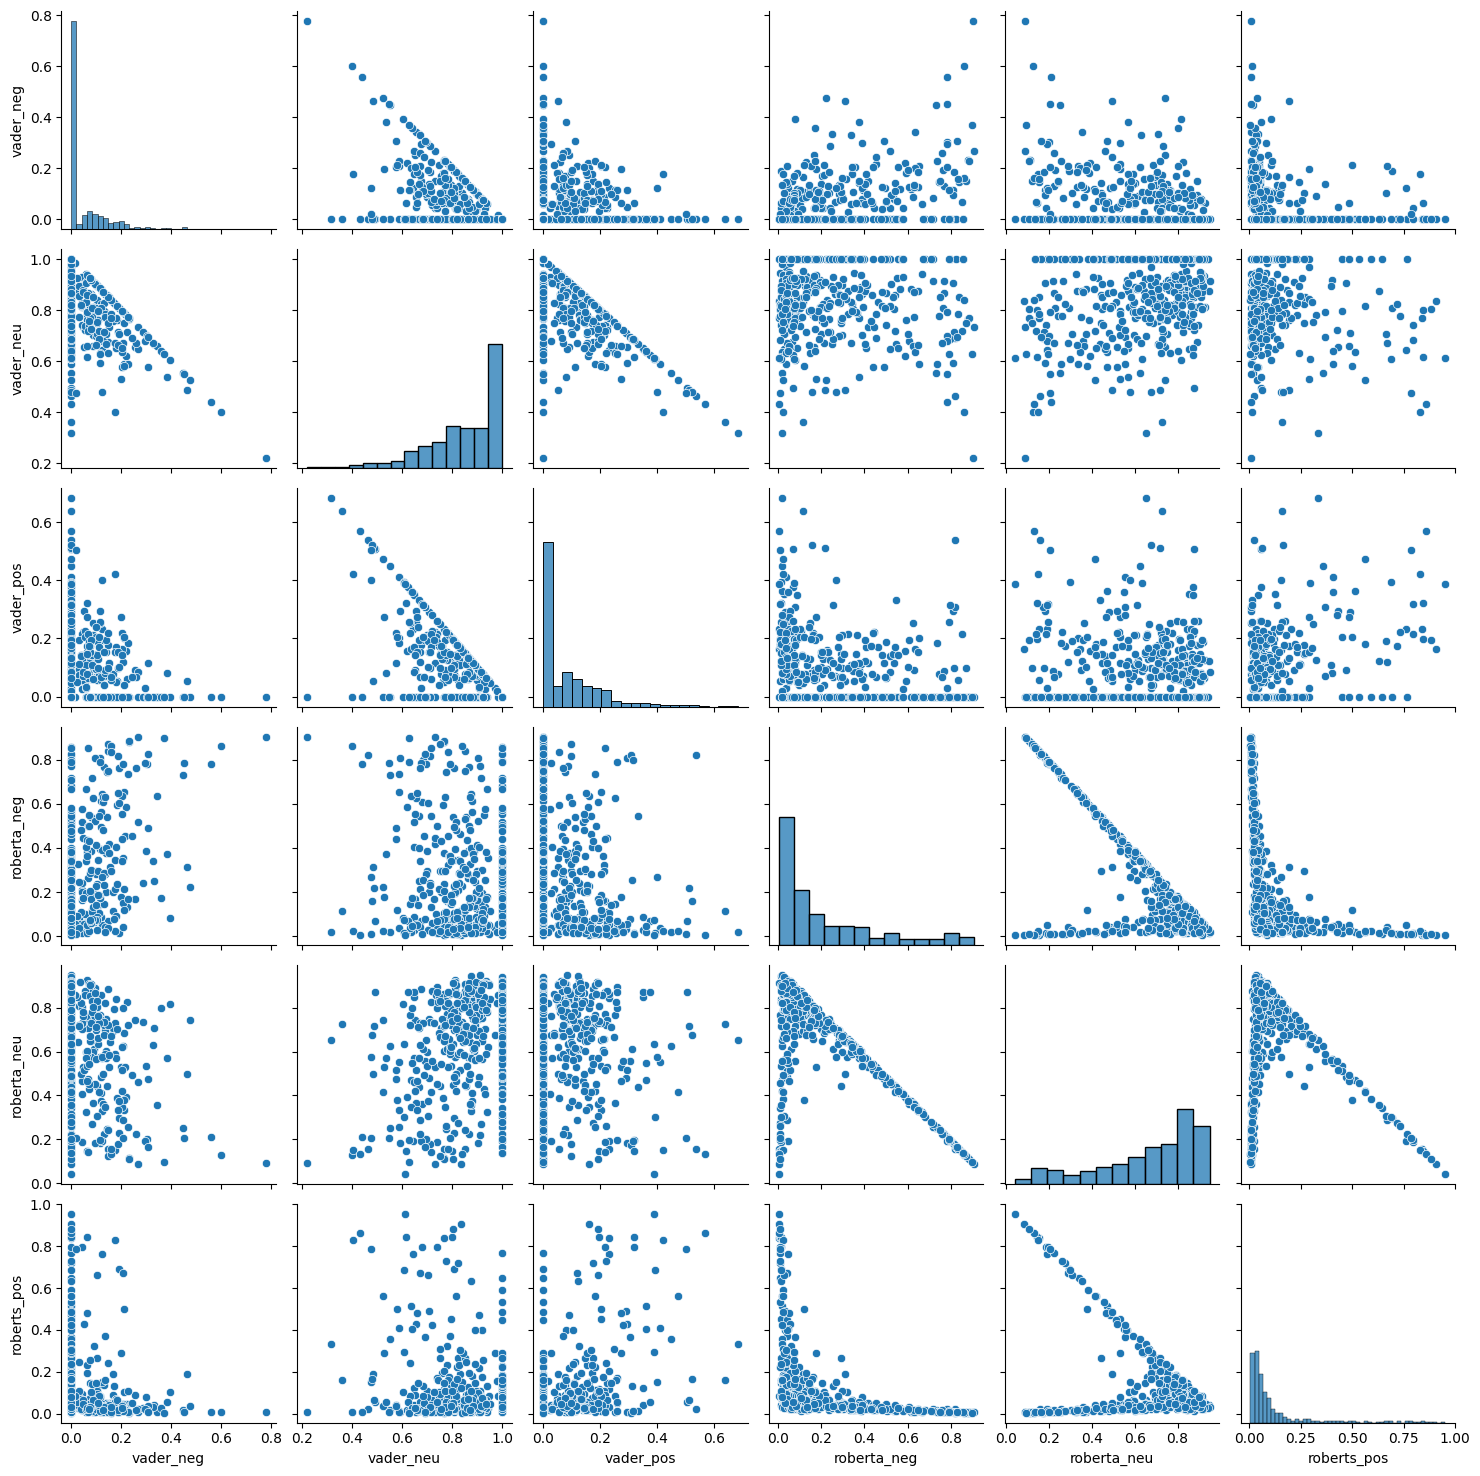

In [30]:
sns.pairplot(data=results_df,
            vars=['vader_neg', 'vader_neu', 'vader_pos', 
                 'roberta_neg', 'roberta_neu', 'roberts_pos']
            )
plt.show()

### I just want to get one score from the Roberta model to use

In [31]:
from transformers import pipeline

sentiment_task = pipeline("sentiment-analysis", model=f"cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer=AutoTokenizer.from_pretrained(MODEL))

2024-04-24 14:50:06.512608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 14:50:06.512753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 14:50:06.670827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another ar

In [32]:
# let's run it on the whole dataset and store the results in a dictionary

df = df.sample(n=30000).reset_index()

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['sentence_lowered']
    myid = row.name
    res[myid] = sentiment_task(text)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [33]:
# store result in a dataframe

results_df = pd.DataFrame(res).T
results_df = results_df.merge(df, left_index=True, right_index=True)
results_df.rename(columns={0 : 'roberta_output'},inplace=True)
results_df.head()

,roberta_output,index,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,"{'label': 'neutral', 'score': 0.8806995153427124}",162138,Quintessence,Quine,analytic,It a be put in three Anglo Saxon monosyllables...,It a be put in three Anglo Saxon monosyllables...,1950,2004,62,it a be put in three anglo saxon monosyllables...,"['it', 'be', 'put', 'in', 'three', 'anglo', 's...",-PRON- a be put in three Anglo Saxon monosyll...
1,"{'label': 'neutral', 'score': 0.5634997487068176}",335213,Twilight Of The Idols,Nietzsche,nietzsche,It was precisely a death such as Christ's that...,It was precisely a death such as Christ's that...,1888,2016,71,it was precisely a death such as christ's that...,"['it', 'was', 'precisely', 'death', 'such', 'a...",-PRON- be precisely a death such as Christ 's...
2,"{'label': 'negative', 'score': 0.8469544053077...",247770,Off The Beaten Track,Heidegger,phenomenology,Could a mere translation have caused all this?,Could a mere translation have caused all this?,1950,2001,46,could a mere translation have caused all this?,"['could', 'mere', 'translation', 'have', 'caus...",Could a mere translation have cause all this ?
3,"{'label': 'neutral', 'score': 0.8547824025154114}",265099,The System Of Ethics,Fichte,german_idealism,All consciousness therefore begins with someth...,All consciousness therefore begins with someth...,1798,2005,185,all consciousness therefore begins with someth...,"['all', 'consciousness', 'therefore', 'begins'...",all consciousness therefore begin with someth...
4,"{'label': 'neutral', 'score': 0.7378984093666077}",141859,Philosophical Investigations,Wittgenstein,analytic,But if I make the supposition that I can feel ...,But if I make the supposition that I can feel ...,1953,1986,134,but if i make the supposition that i can feel ...,"['but', 'if', 'make', 'the', 'supposition', 't...",but if -PRON- make the supposition that -PRON...


In [34]:
results_df['roberta_label'] = results_df['roberta_output'].apply(lambda x: x['label'])
results_df['roberta_score'] = results_df['roberta_output'].apply(lambda x: round(x['score'], 2))

results_df.head()

,roberta_output,index,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,roberta_label,roberta_score
0,"{'label': 'neutral', 'score': 0.8806995153427124}",162138,Quintessence,Quine,analytic,It a be put in three Anglo Saxon monosyllables...,It a be put in three Anglo Saxon monosyllables...,1950,2004,62,it a be put in three anglo saxon monosyllables...,"['it', 'be', 'put', 'in', 'three', 'anglo', 's...",-PRON- a be put in three Anglo Saxon monosyll...,neutral,0.88
1,"{'label': 'neutral', 'score': 0.5634997487068176}",335213,Twilight Of The Idols,Nietzsche,nietzsche,It was precisely a death such as Christ's that...,It was precisely a death such as Christ's that...,1888,2016,71,it was precisely a death such as christ's that...,"['it', 'was', 'precisely', 'death', 'such', 'a...",-PRON- be precisely a death such as Christ 's...,neutral,0.56
2,"{'label': 'negative', 'score': 0.8469544053077...",247770,Off The Beaten Track,Heidegger,phenomenology,Could a mere translation have caused all this?,Could a mere translation have caused all this?,1950,2001,46,could a mere translation have caused all this?,"['could', 'mere', 'translation', 'have', 'caus...",Could a mere translation have cause all this ?,negative,0.85
3,"{'label': 'neutral', 'score': 0.8547824025154114}",265099,The System Of Ethics,Fichte,german_idealism,All consciousness therefore begins with someth...,All consciousness therefore begins with someth...,1798,2005,185,all consciousness therefore begins with someth...,"['all', 'consciousness', 'therefore', 'begins'...",all consciousness therefore begin with someth...,neutral,0.85
4,"{'label': 'neutral', 'score': 0.7378984093666077}",141859,Philosophical Investigations,Wittgenstein,analytic,But if I make the supposition that I can feel ...,But if I make the supposition that I can feel ...,1953,1986,134,but if i make the supposition that i can feel ...,"['but', 'if', 'make', 'the', 'supposition', 't...",but if -PRON- make the supposition that -PRON...,neutral,0.74


In [35]:
results_df.to_csv('/kaggle/working/philosophy_roberta_results.csv')